This file builds on the Tornado_Alley_vis file that is in Version 1 of this project.

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import data
csv_path = Path("../../Resources/us_tornado_data_complete.csv")
tornadoes_df = pd.read_csv(csv_path, encoding="UTF-8")
tornadoes_df.head()

,index_name,Year,Date,State,Rating,Injuries,Death,Start_Lat,Start_Lon,Width
0,0,1950,1950-01-03,IL,3,3,0,39.10,-89.30,130
1,1,1950,1950-01-03,MO,3,3,0,38.77,-90.22,150
2,2,1950,1950-01-03,OH,1,1,0,40.88,-84.58,10
3,3,1950,1950-01-13,AR,3,1,1,34.40,-94.37,17
4,4,1950,1950-01-25,IL,2,0,0,41.17,-87.33,100


In [3]:
#Check data types
tornadoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70428 entries, 0 to 70427
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index_name  70428 non-null  int64  
 1   Year        70428 non-null  int64  
 2   Date        70428 non-null  object 
 3   State       70428 non-null  object 
 4   Rating      70428 non-null  object 
 5   Injuries    70428 non-null  int64  
 6   Death       70428 non-null  int64  
 7   Start_Lat   70428 non-null  float64
 8   Start_Lon   70428 non-null  float64
 9   Width       70428 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 5.4+ MB


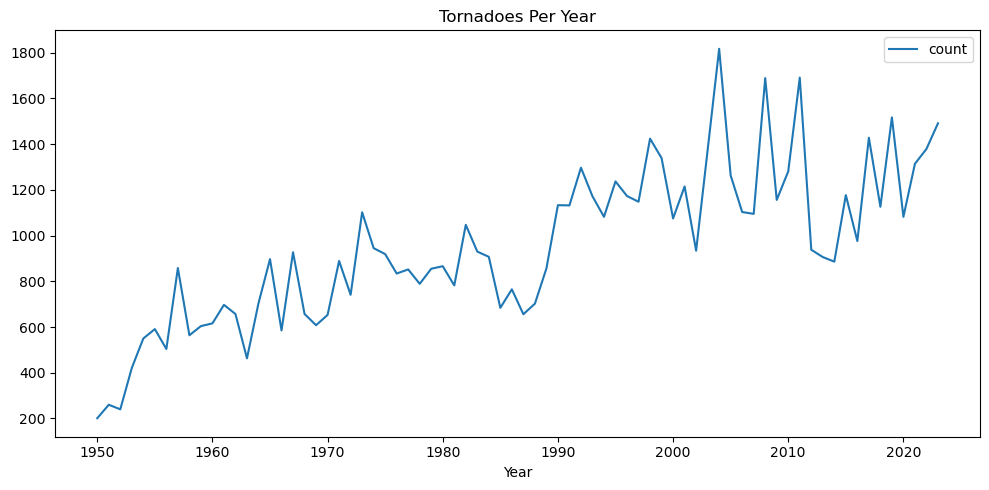

In [4]:
# Create a visual of tornadoes per year
a = tornadoes_df["Year"].value_counts()
b = pd.DataFrame(a)
Torandoes_per_year = b.sort_values("Year")


Torandoes_per_year.plot(kind="line", figsize=(10, 5))
plt.title("Tornadoes Per Year")
plt.tight_layout()

In [13]:
tornadoes_df.loc[tornadoes_df["Rating"] == "U"].loc[tornadoes_df["Injuries"] != 0]

,index_name,Year,Date,State,Rating,Injuries,Death,Start_Lat,Start_Lon,Width


/Users/downleft/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


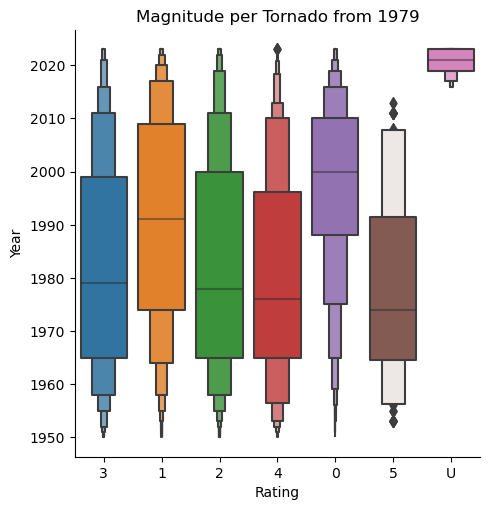

In [7]:
sns.catplot(data=tornadoes_df, x="Rating", y="Year", kind="boxen").set(title="Magnitude per Tornado from 1950")

C:\Users\blake\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


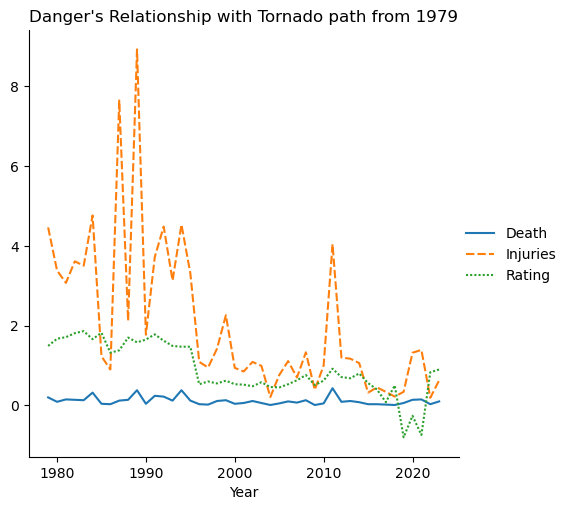

In [238]:
R = tornadoes_df.groupby("Year")["Rating"].mean()
Rdfr = round(R, 2)
Rdf = pd.DataFrame(Rdfr)

I = tornadoes_df.groupby("Year")["Injuries"].mean()
Idfr = round(I, 2)
Idf = pd.DataFrame(Idfr)

D = tornadoes_df.groupby("Year")["Death"].mean()
Ddfr = round(D, 2)
Ddf = pd.DataFrame(Ddfr)

Merge1 = pd.merge(Ddf, Idf, on="Year")
Merged_Danger_df = pd.merge(Merge1, Rdf, on="Year")

sns.relplot(data=Merged_Danger_df, kind="line").set(title="Danger's Relationship with Tornado path from 1979")